<a href="https://colab.research.google.com/github/charliashby/labs/blob/main/04_HedonicPricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('pierce_county_house_sales.csv')
print(df.head())

Saving pierce_county_house_sales.csv to pierce_county_house_sales.csv
    sale_date  sale_price  house_square_feet  attic_finished_square_feet  \
0  2020-01-02      380000               2157                           0   
1  2020-01-02      383000               2238                           0   
2  2020-01-01      419900               1452                           0   
3  2020-01-02      251660                832                           0   
4  2020-01-02      500000               1780                           0   

   basement_square_feet  attached_garage_square_feet  \
0                     0                          528   
1                     0                          396   
2                     0                            0   
3                     0                            0   
4                   384                          484   

   detached_garage_square_feet  fireplaces        hvac_description  \
0                            0           0  Warm and Cool Air Zone

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16814 entries, 0 to 16813
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sale_date                    16814 non-null  object
 1   sale_price                   16814 non-null  int64 
 2   house_square_feet            16814 non-null  int64 
 3   attic_finished_square_feet   16814 non-null  int64 
 4   basement_square_feet         16814 non-null  int64 
 5   attached_garage_square_feet  16814 non-null  int64 
 6   detached_garage_square_feet  16814 non-null  int64 
 7   fireplaces                   16814 non-null  int64 
 8   hvac_description             16807 non-null  object
 9   exterior                     16813 non-null  object
 10  interior                     16807 non-null  object
 11  stories                      16814 non-null  int64 
 12  roof_cover                   16806 non-null  object
 13  year_built                   16

<ipython-input-8-11e049ac0b23>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype('category')
<ipython-input-8-11e049ac0b23>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype('category')
<ipython-input-8-11e049ac0b23>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

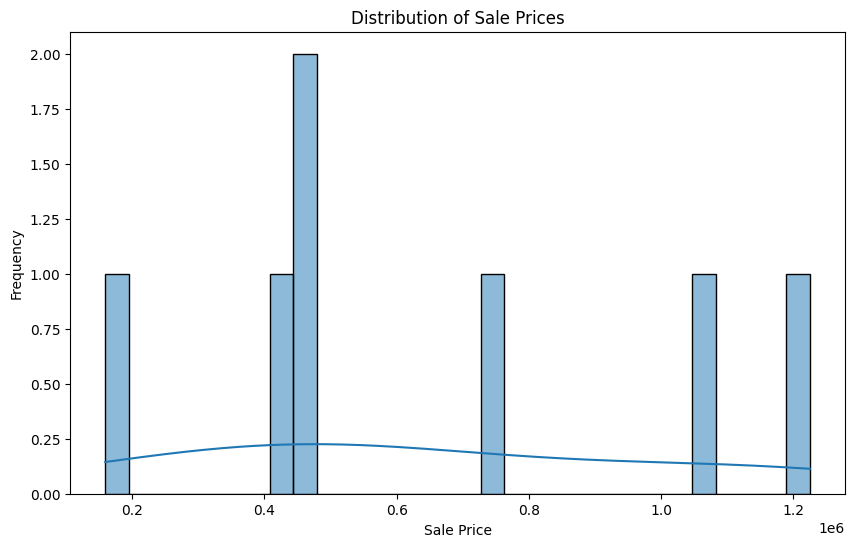

In [8]:
# Question 1: Clean and EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
print(df.info())
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Data Cleaning: Handle missing values (if any)
# For simplicity, drop rows with missing values
df_cleaned = df.dropna()

# Convert categorical variables to category type
categorical_cols = ['hvac_description', 'exterior', 'interior', 'roof_cover', 'waterfront_type', 'view_quality', 'utility_sewer']
for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].astype('category')

# Exploratory Data Analysis (EDA)
# Plot distribution of sale prices
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['sale_price'], bins=30, kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Question 2: Transform
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Handle missing values by dropping rows with missing data
df_cleaned = df.dropna()

# One-Hot Encoding for Categorical Variables
categorical_cols = ['hvac_description', 'exterior', 'interior', 'roof_cover', 'waterfront_type', 'view_quality', 'utility_sewer']
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols)

# Feature Scaling for Numerical Variables
numerical_cols = ['house_square_feet', 'attic_finished_square_feet', 'basement_square_feet',
                  'attached_garage_square_feet', 'detached_garage_square_feet', 'fireplaces',
                  'year_built', 'bedrooms', 'bathrooms']

scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

df_encoded.head(10)

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,stories,year_built,...,roof_cover_Formed Seam Metal,waterfront_type_WF River,waterfront_type_WF Stream/Creek,view_quality_View Avg,view_quality_View Good,view_quality_View Lim,view_quality_View Lim +,view_quality_View Lim -,view_quality_View V-Good,utility_sewer_SEWER/SEPTIC INSTALLED
3742,2020-04-01,475000,-1.151291,-0.408248,-0.881197,1.270497,0.0,-1.020621,2,1.148158,...,True,True,False,False,False,True,False,False,False,True
4702,2020-05-15,1225000,1.315297,2.449490,0.895426,0.653035,0.0,1.837117,2,-0.229632,...,False,True,False,False,False,False,False,False,True,True
4797,2020-05-19,750000,0.341544,-0.408248,1.915866,-1.717712,0.0,0.408248,1,-1.435198,...,False,False,True,True,False,False,False,False,False,True
5441,2020-06-03,159247,0.728961,-0.408248,0.219537,0.152460,0.0,0.408248,2,-0.287040,...,False,False,True,False,False,False,True,False,False,True
5857,2020-06-03,1075000,0.943983,-0.408248,-0.881197,0.975741,0.0,0.408248,2,1.090750,...,False,True,False,False,True,False,False,False,False,True
15433,2020-12-04,442500,-1.216650,-0.408248,-0.387239,-0.398936,0.0,-1.020621,1,-1.205566,...,False,False,True,False,False,False,False,True,False,True
16773,2020-12-22,450000,-0.961845,-0.408248,-0.881197,-0.935086,0.0,-1.020621,1,0.918527,...,False,True,False,False,False,True,False,False,False,True


In [22]:
# Question 3: Train-test split
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_cleaned, test_size=0.2, random_state=42)

In [23]:
# Question 4: Simple Linear Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example using 'house_square_feet' as a predictor
X_train = train_data[['house_square_feet']]
y_train = train_data['sale_price']
X_test = test_data[['house_square_feet']]
y_test = test_data['sale_price']

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and RMSE calculation
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)

print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")

Train RMSE: 290026.89403145254, Test RMSE: 337381.4589349037


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [24]:
# Question 5: Complex Model
from sklearn.preprocessing import PolynomialFeatures

# Example with polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(train_data[['house_square_feet', 'year_built']])
X_test_poly = poly.transform(test_data[['house_square_feet', 'year_built']])

complex_model = LinearRegression()
complex_model.fit(X_train_poly, y_train)

# Predictions and RMSE calculation for complex model
train_predictions_complex = complex_model.predict(X_train_poly)
test_predictions_complex = complex_model.predict(X_test_poly)
train_rmse_complex = mean_squared_error(y_train, train_predictions_complex, squared=False)
test_rmse_complex = mean_squared_error(y_test, test_predictions_complex, squared=False)

print(f"Complex Model - Train RMSE: {train_rmse_complex}, Test RMSE: {test_rmse_complex}")

Complex Model - Train RMSE: 7.297412506694829e-05, Test RMSE: 3838552.9483544664


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
# Question 6: Comparisons

# Simple Model - Train RMSE: 290026.89403145254, Test RMSE: 337381.45893490384

# Complex Model - Train RMSE: 7.297412506694829e-05, Test RMSE: 3838552.9483544664
